### 어제 답안

In [2]:
import sys
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

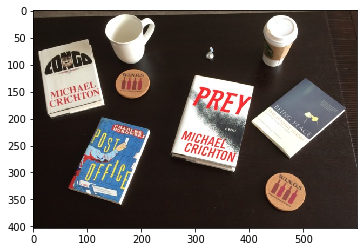

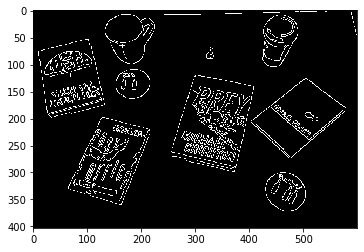

In [8]:
image = cv2.imread('vision/book.jpg')
imshow("", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)

imshow("", edged)

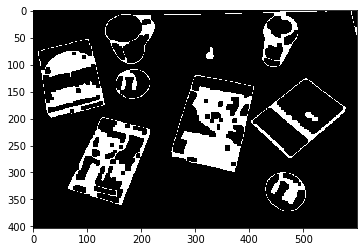

True

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow("", closed)

cv2.imwrite("result.png", closed)

8 4100.0
4 14438.5
4 13100.0
4 18798.0
8 2701.0
8 183.5
4 12816.5
10 11009.0


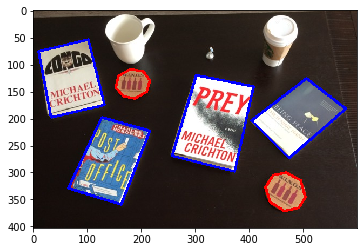

In [16]:
cnts, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread("vision/book.jpg")
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
    print(len(approx), area)
    if len(approx) == 8 and area > 200 :        
        cv2.drawContours(image, [approx], -1, (0, 0, 255), 4)
    if len(approx) == 4 :        
        cv2.drawContours(image, [approx], -1, (255, 0, 0), 4)        

imshow("", image)

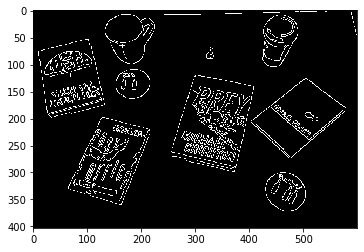

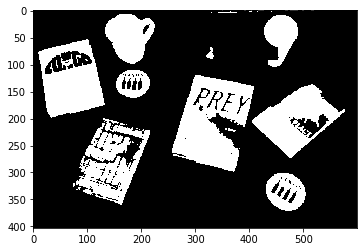

In [16]:
image = cv2.imread("vision/book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
_, edged2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imshow("", edged)
imshow("", edged2)


In [22]:
img = cv2.addWeighted(edged, 0.5, edged2, 0.5, 0.0)

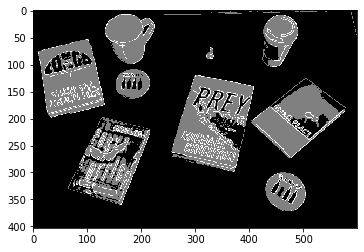

In [23]:
imshow("", img)

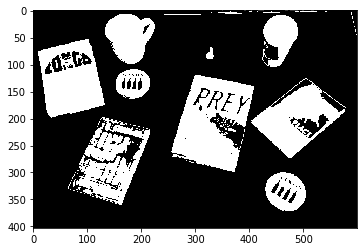

In [24]:
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
imshow("", img)

8 4100.0
4 1.0
1 0.0
2 0.0
2 0.0
2 0.0
1 0.0
1 0.0
2 0.0
2 0.0
1 0.0
3 1.0
10 11178.0
7 272.5
6 11870.5
6 18696.5
8 2701.0
10 178.5
4 12816.5
11 3883.5
2 0.0
1 0.0
2 0.0
1 0.0
4 2.0
3 1.0
2 0.0
8 5887.5
4 7.0
8 8.0
8 10.5
4 3.0
2 0.0


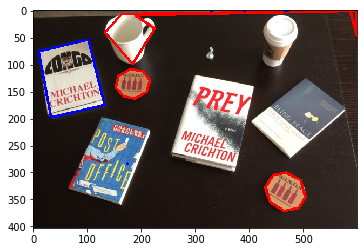

In [25]:
cnts, _ = cv2.findContours(img, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread("vision/book.jpg")
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
    print(len(approx), area)
    if len(approx) == 8 and area > 200 :        
        cv2.drawContours(image, [approx], -1, (0, 0, 255), 4)
    if len(approx) == 4 :        
        cv2.drawContours(image, [approx], -1, (255, 0, 0), 4)        

imshow("", image)

8 4100.0
4 1.0
1 0.0
2 0.0
2 0.0
2 0.0
1 0.0
1 0.0
2 0.0
2 0.0
1 0.0
3 1.0
10 11178.0
7 272.5
6 11870.5
6 18696.5
8 2701.0
10 178.5
4 12816.5
11 3883.5
2 0.0
1 0.0
2 0.0
1 0.0
4 2.0
3 1.0
2 0.0
8 5887.5
4 7.0
8 8.0
8 10.5
4 3.0
2 0.0


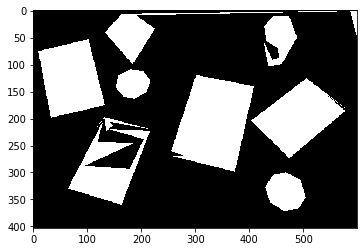

In [27]:
cnts, _ = cv2.findContours(img, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread("vision/book.jpg")

mask = np.zeros((image.shape[0], image.shape[1]) , dtype='uint8')
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
    print(len(approx), area)
    if  area > 200 :
        cv2.drawContours(mask, [approx], -1, (255, 255, 255), -1)
    
imshow("", mask)

# 다각형 피팅

컨투어를 피팅한다는 것은 센터와 반지름을 구한다는 것  

사각형이면 시작점과 끝점을 모델링  



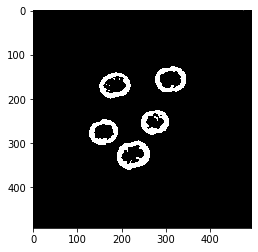

In [33]:
frame = cv2.imread("vision/coin.png", 0)
gray_blur = cv2.GaussianBlur(frame, (7,7), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 45, 6)
# ADAPTIVE_THRESH_GAUSSIAN_C: 거리에 따른 가중치를 준다. 
# 45: 주변에 몇개까지 볼것인가
# 6: 평균에서 6만큼 떨어진 것 까지는 기준점을 움직여 배경영역이 더 많아지고 오브젝트 영역이 더 작아짐

imshow("", thresh)

# _, thresh = cv2.threshold(gray_blur, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
# imshow("", thresh)


안쪽이 완전 채워지게 만들수는 없다.  
지역적으로 밝고 어두움을 구별하기 때문이다.  

일반 `threshold`는 완전 구별해내지 못한다.  


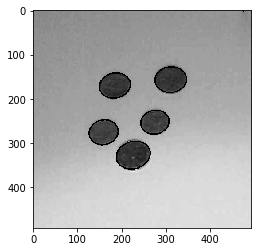

In [36]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if len(cnt) < 5:
        continue
    ellipse =cv2.fitEllipse(cnt) # 타원 맞추기
    cv2.ellipse(frame, ellipse, (0,255, 0), 2)

imshow("", frame)

In [ ]:
image = cv2.imread("vision/5.jpg", 0)


# 손가락 검출

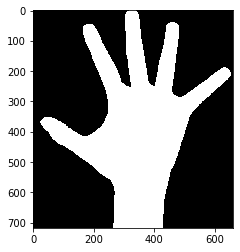

In [88]:
hand_img = cv2.imread('vision/5.jpg')

hsv_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2HSV)
lower_band = np.array([0, 23, 0])
upper_band = np.array([255, 189, 255])

mask = cv2.inRange(hsv_img, lower_band, upper_band)

imshow("", mask)


1
345.5 362.71337890625 363.53997802734375


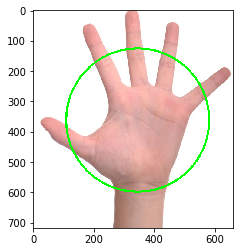

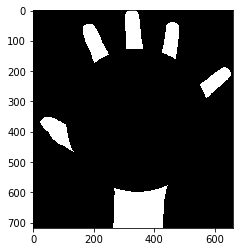

In [90]:
cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = cnts[0]

print(len(cnts)) # 영상이 깔끔해서 손만 나옴

(cX, cY), r = cv2.minEnclosingCircle(c)

print(cX, cY, r) # x점, y점, 반지름

cv2.circle(hand_img, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), 5)
           
imshow("", hand_img)

cv2.circle(mask, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), -1)

imshow("", mask)

In [91]:
cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("number of finger is : ",len(cnts)-1)

# for c in cnts:
#     area = cv2.contourArea(c)
#     print(area)
        
#     approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
#     if  area > 10 :
#         cv2.drawContours(mask, [approx], -1, (0, 0, 255), 3)

number of finger is :  6


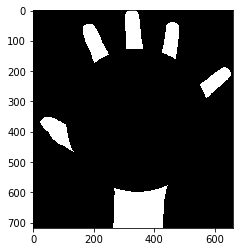

In [92]:
imshow("", mask)

In [93]:
for c in cnts:
    M = cv2.moments(c) # x의 i승 y의 j승의 가중치의 면적  
    # sum에 대한 가충치
    print(M)
    cX = int(M["m10"] / M["m00"])    # 축의 센터 point를 계산 가능
    cY = int(M["m01"] / M["m00"])    # m00 : 면적을 의미 x의 0승 y의 0승
    
    if cY <= 500 :
        cv2.circle(hand_img, (int(cX), int(cY)), 5, (0, 0, 255), 5)
        
imshow("", hand_img)

{'m00': 20318.0, 'm10': 7111707.666666666, 'm01': 13296728.5, 'm20': 2536730799.6666665, 'm11': 4651499231.25, 'm02': 8728362339.833332, 'm30': 921144456243.9, 'm21': 1658117149268.1833, 'm12': 3051726407230.3833, 'm03': 5746880873544.051, 'mu20': 47490424.82044935, 'mu11': -2622533.443137169, 'mu02': 26571376.02231407, 'mu30': -7424494.193725586, 'mu21': -162176372.5418625, 'mu12': 56993937.432266235, 'mu03': -8044069.3359375, 'nu20': 0.11503874695241939, 'nu11': -0.00635271135770942, 'nu02': 0.06436534973029642, 'nu30': -0.00012617243424291292, 'nu21': -0.0027560379422998022, 'nu12': 0.0009685594244244204, 'nu03': -0.00013670154260363333}
{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


ZeroDivisionError: float division by zero

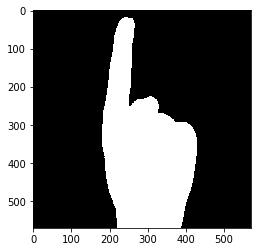

1
302.0 296.5390930175781 284.82275390625


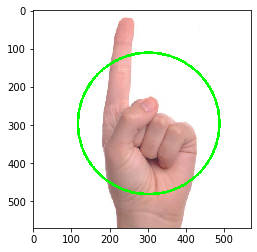

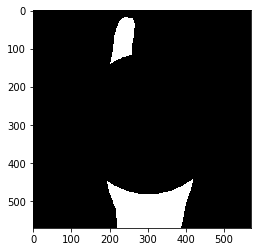

number of finger is :  1


In [63]:
hand_img = cv2.imread('vision/1.jpg')

hsv_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2HSV)
lower_band = np.array([0, 23, 0])
upper_band = np.array([255, 189, 255])

mask = cv2.inRange(hsv_img, lower_band, upper_band)

imshow("", mask)

cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = cnts[0]

print(len(cnts)) # 영상이 깔끔해서 손만 나옴

(cX, cY), r = cv2.minEnclosingCircle(c)

print(cX, cY, r) # x점, y점, 반지름

cv2.circle(hand_img, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), 5)
           
imshow("", hand_img)

cv2.circle(mask, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), -1)

imshow("", mask)
cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("number of finger is : ",len(cnts)-1)


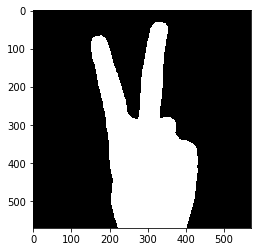

1
302.5169677734375 308.2913513183594 278.68975830078125


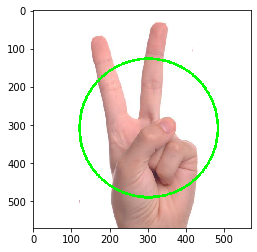

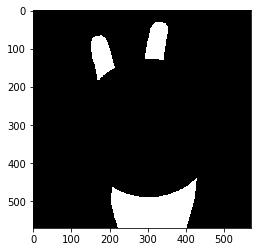

number of finger is :  2


In [102]:
hand_img = cv2.imread('vision/2.jpg')

hsv_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2HSV)
lower_band = np.array([0, 23, 0])
upper_band = np.array([255, 189, 255])

mask = cv2.inRange(hsv_img, lower_band, upper_band)
mask = cv2.medianBlur(mask, 5)
imshow("", mask)

cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = cnts[0]

print(len(cnts)) # 영상이 깔끔해서 손만 나옴

(cX, cY), r = cv2.minEnclosingCircle(c)

print(cX, cY, r) # x점, y점, 반지름

cv2.circle(hand_img, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), 5)
           
imshow("", hand_img)

cv2.circle(mask, (int(cX), int(cY)), int(r* 0.65), (0, 255, 0), -1)

imshow("", mask)
cnts, _ =  cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("number of finger is : ",len(cnts)-1)


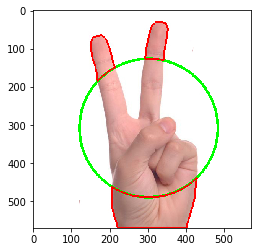

In [95]:
cv2.drawContours(hand_img, cnts, -1, (0,0,255), 3) # -1: all
imshow("",hand_img)

{'m00': 18666.0, 'm10': 5893447.166666666, 'm01': 9715636.166666666, 'm20': 1934494179.5, 'm11': 3062780642.0, 'm02': 5071625049.166666, 'm30': 657141816224.05, 'm21': 1003272607001.3667, 'm12': 1596513640109.4333, 'm03': 2654960506389.35, 'mu20': 73746322.09662747, 'mu11': -4753293.433721542, 'mu02': 14645186.151486397, 'mu30': -207339842.1850586, 'mu21': -628338413.7062683, 'mu12': 189214029.0685959, 'mu03': -61370388.650878906, 'nu20': 0.2116595375508356, 'nu11': -0.013642441567549504, 'nu02': 0.04203319216527099, 'nu30': -0.004355666401176246, 'nu21': -0.013199742453290994, 'nu12': 0.003974890596809083, 'nu03': -0.0012892309411289028}
{'m00': 4598.0, 'm10': 822563.3333333333, 'm01': 551774.6666666666, 'm20': 148056274.3333333, 'm11': 99160598.33333333, 'm02': 69835019.0, 'm30': 26811573082.4, 'm21': 17927861378.833332, 'm12': 12594300837.966667, 'm03': 9253950689.0, 'mu20': 903069.169252336, 'mu11': 450374.526847437, 'mu02': 3620298.953216389, 'mu30': 1802375.8487586975, 'mu21': -5

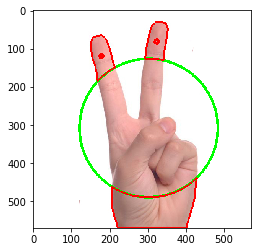

In [96]:
for c in cnts:
    M = cv2.moments(c) # x의 i승 y의 j승의 가중치의 면적  
    # sum에 대한 가충치 (무게중심)
    print(M)
    cX = int(M["m10"] / M["m00"])    # 축의 센터 point를 계산 가능
    cY = int(M["m01"] / M["m00"])    # m00 : 면적을 의미 x의 0승 y의 0승
    
    if cY <= 500 :
        cv2.circle(hand_img, (int(cX), int(cY)), 5, (0, 0, 255), 5)
        
imshow("", hand_img)

### convexHull

들어간 경계가 없는 볼록한 다각형을 만드는 알고리즘

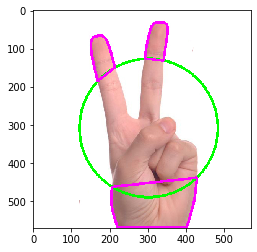

In [104]:
for c in cnts:
    hull = cv2.convexHull(c) # 들어간 경계가 없는 볼록한 다각형을 만드는 알고리즘
    cv2.drawContours(hand_img, [hull], 0, (255, 0, 255), 5)
imshow("", hand_img)

### boundingRect

contour가 다 들어가는 박스를 만드는 알고리즘 

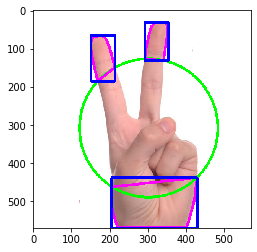

In [106]:
for c in cnts:
    hull = cv2.convexHull(c) # 들어간 경계가 없는 볼록한 다각형을 만드는 알고리즘
    cv2.drawContours(hand_img, [hull], 0, (255, 0, 255), 5)
    
    x, y, w, h = cv2.boundingRect(c) # contour가 다 들어가는 박스를 만드는 알고리즘 
    cv2.rectangle(hand_img, (x, y), (x + w, y + h), (255,0, 0), 5)
    
imshow("", hand_img)

### minAreaRect

최소 영역의 사각형 (회전이 될 수 있음)

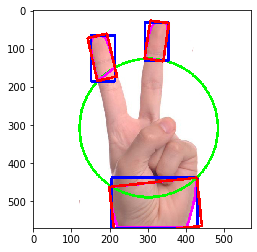

In [107]:
for c in cnts:
    hull = cv2.convexHull(c) # 들어간 경계가 없는 볼록한 다각형을 만드는 알고리즘
    cv2.drawContours(hand_img, [hull], 0, (255, 0, 255), 5)
    
    x, y, w, h = cv2.boundingRect(c) # contour가 다 들어가는 박스를 만드는 알고리즘 
    cv2.rectangle(hand_img, (x, y), (x + w, y + h), (255,0, 0), 5)
    
    rect = cv2.minAreaRect(c) # 최소 영역의 사각형 (회전이 될 수 있음)
    box = cv2.boxPoints(rect) # 포인트를 잡아줌
    box = np.int0(box) # int형으로 변경
    cv2.drawContours(hand_img, [box], 0, (0,0,255), 5)
    
imshow("", hand_img)